In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [ ]:
data = pd.read_csv('/content/Heart diseses dataset.csv')

In [ ]:
x = data.drop(["target"], axis="columns")
y = data["target"]

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [ ]:
mlp_model = MLPClassifier(hidden_layer_sizes=(100, 50), activation='relu', solver='adam', random_state=42)
mlp_model.fit(x_train, y_train)

MLPClassifier(hidden_layer_sizes=(100, 50), random_state=42)

In [ ]:
y_pred = mlp_model.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score, recall_score, f1_score
accuracy_score(y_test,y_pred)

0.7987012987012987

In [ ]:
precision_score(y_test,y_pred)

0.7636363636363637

In [ ]:
recall_score(y_test,y_pred)

0.8456375838926175

In [ ]:
f1_score(y_test,y_pred)

0.802547770700637

In [ ]:
dtree_model = DecisionTreeClassifier(random_state=42)
dtree_model.fit(x_train, y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
feature_importances = dtree_model.feature_importances_

In [ ]:
feature_importance_df = pd.DataFrame({
    'Feature': x.columns,
    'Importance': feature_importances
})

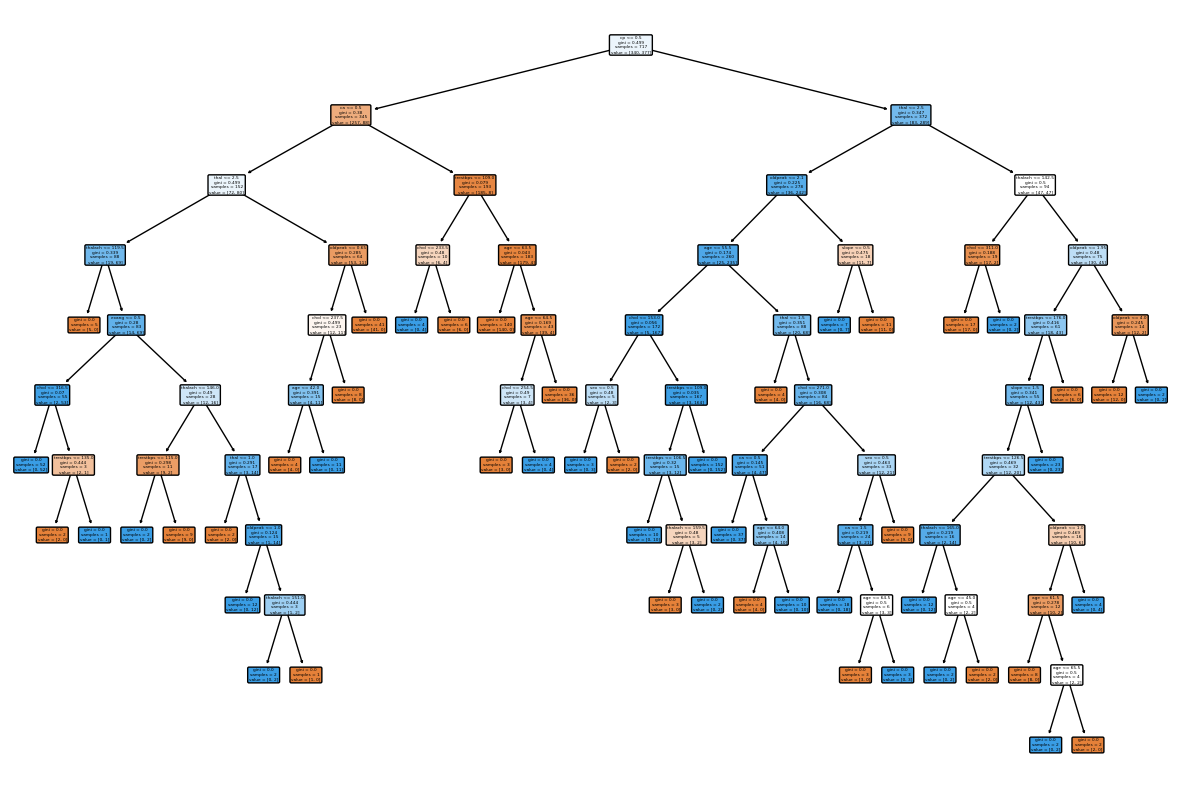

In [ ]:
plt.figure(figsize=(15, 10))
plot_tree(dtree_model, feature_names=x.columns, filled=True, rounded=True)
plt.show()

In [ ]:
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

In [ ]:
top_features = feature_importance_df.head(5)
print("Top 5 features according to Gini index:")
print(top_features)


selected_features = top_features['Feature'].tolist()

Top 5 features according to Gini index:
    Feature  Importance
2        cp    0.272625
12     thal    0.154219
11       ca    0.122752
9   oldpeak    0.086679
0       age    0.080786


In [ ]:
x_selected = x[selected_features]

In [ ]:
x_train_selected, x_test_selected, y_train, y_test = train_test_split(x_selected, y, test_size=0.3, random_state=42)

In [ ]:
mlp_model = MLPClassifier(hidden_layer_sizes=(100, 50), activation='relu', solver='adam', random_state=42)

In [ ]:
mlp_model.fit(x_train_selected, y_train)

MLPClassifier(hidden_layer_sizes=(100, 50), random_state=42)

In [ ]:
y_pred_mlp = mlp_model.predict(x_test_selected)

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score, recall_score, f1_score
accuracy_score(y_test,y_pred_mlp)

0.788961038961039

In [ ]:
precision_score(y_test,y_pred_mlp)

0.7592592592592593

In [ ]:
recall_score(y_test,y_pred_mlp)

0.825503355704698

In [ ]:
f1_score(y_test,y_pred_mlp)

0.7909967845659165